In [9]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import os
import sqlalchemy

In [3]:
csv_file = "simulator_results.csv"
data_lim_exc = []

df = pd.read_csv(csv_file)
for column in ['nsigma', 'rclike', 'triple_max']:
    total_rows = df[column].count()
    predictor_exceeds = (df[column] >= df['limit']).sum()
    data_lim_exc.append((predictor_exceeds*100/total_rows))
    print(f"The percentage of times {column} exceeds the {'limit'} is: {(predictor_exceeds*100/total_rows):.2f} %.")
    

The percentage of times nsigma exceeds the limit is: 94.02 %.
The percentage of times rclike exceeds the limit is: 55.23 %.
The percentage of times triple_max exceeds the limit is: 94.02 %.


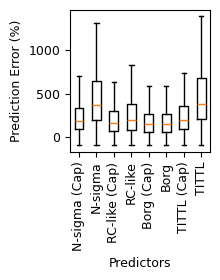

In [6]:
data = pd.read_csv('filled_csvs/filled_simulator_results.csv')

predictors = ['nsigma', 'rclike', 'borg', 'triple_max']

data_values = []

for predictor in predictors:
    if predictor == 'borg':
        differences = (data[predictor] - data['total_usage'])*100 / data['total_usage']
    else:
        differences = (data[predictor] - data['total_usage']) * 100 / data['total_usage']
        limit_mask = data[predictor] > data['limit']
        differences[limit_mask] = (data['limit'] - data['total_usage']) * 100 / data['total_usage']
        
        zero_mask1 = data['total_usage'] == 0
        zero_mask2 = data['limit'] == 0
        differences[zero_mask1] = 0
        differences[zero_mask2] = 0
    data_values.append(differences.dropna())

    differences1 = (data[predictor] - data['total_usage'])*100 / data['total_usage']
    zero_mask1 = data['total_usage'] == 0
    differences1[zero_mask1] = 0
    data_values.append(differences1.dropna())
    

plt.figure(figsize=(2.3, 2.9))
plt.boxplot(data_values, labels=['N-sigma (Cap)','N-sigma', 'RC-like (Cap)', 'RC-like','Borg (Cap)', 'Borg','TITTL (Cap)', 'TITTL'], showfliers=False)
plt.xlabel('Predictors', size=9)
plt.ylabel('Prediction Error (%)', size=9)
plt.xticks(rotation=90, size=9)
plt.yticks(size=9)
plt.tight_layout()
plt.show()

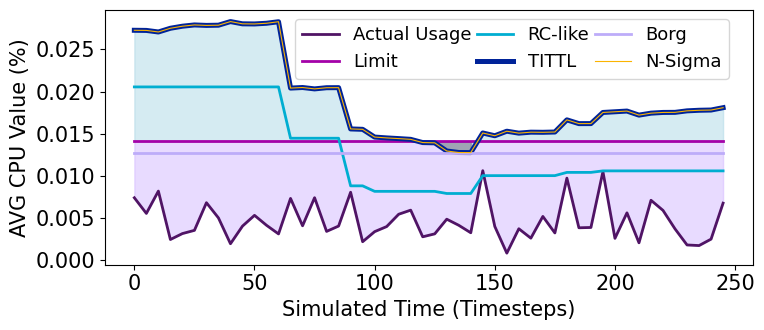

In [10]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

csv_directory = 'machine_csvs/'
csv_files = '35897092254 copy.csv'

data = pd.read_csv(os.path.join(csv_directory, csv_files))
column_names = ['total_usage', 'limit', 'rclike', 'triple_max', 'borg', 'nsigma']

CB_color_cycle = ['#501465', '#A402A8', '#00AED1', '#002399', '#BDACF9', '#FBB401']

plt.figure(figsize=(7.8, 3.4)) 

for i, col in enumerate(column_names):
    if col == 'nsigma':
        plt.plot(data['simulated_time'], data[col], label=col, color=CB_color_cycle[i], linewidth=0.8)
    elif col == 'triple_max':
        plt.plot(data['simulated_time'], data[col], label=col, color=CB_color_cycle[i], linewidth=3.6) 
    elif col == 'borg':
        plt.plot(data['simulated_time'], data['limit'] * 0.9, label=col, color=CB_color_cycle[i], linewidth=2)
    else:
        plt.plot(data['simulated_time'], data[col], label=col, color=CB_color_cycle[i], linewidth=2)


plt.fill_between(data['simulated_time'], data['total_usage'], data['limit'], color='#d3b8ff', alpha=0.5)
plt.fill_between(data['simulated_time'], data['triple_max'], data['limit'], color='lightblue', alpha=0.5)

intersection_mask = data['triple_max'] <= data['limit']
plt.fill_between(data['simulated_time'][intersection_mask], data['triple_max'][intersection_mask], data['limit'][intersection_mask], color='#767377', alpha=0.5)

plt.xlabel('Simulated Time (Timesteps)', fontsize=15)
plt.ylabel('AVG CPU Value (%)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

your_labels = ['Actual Usage', 'Limit', 'RC-like', 'TITTL', 'Borg', 'N-Sigma']

plt.legend(your_labels, fontsize=13, bbox_to_anchor=(0.28, 1), loc='upper left', ncol=3, columnspacing=0.3)
plt.tight_layout()  